Model 3

#Libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
import graphviz 
import csv

# Retrieving data

In [ ]:
url = 'https://raw.githubusercontent.com/harshvijay2776/Data-Science/main/recruitmentdataset-2022-1.3.csv'

In [ ]:
company_A = pd.read_csv(url)
company_A[1:10]

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
5,x9063d,female,26,Dutch,Chess,63,False,False,False,False,1,True,bachelor,A,True
6,x5785d,female,27,Dutch,Tennis,63,True,True,False,False,2,True,bachelor,A,False
7,x8767c,female,22,Dutch,Swimming,71,False,True,False,False,1,True,master,A,True
8,x6541b,female,28,Dutch,Football,65,True,False,False,True,3,False,bachelor,A,False
9,x3890b,male,24,Dutch,Football,55,True,False,False,True,3,False,master,A,True


In [ ]:
dataset_company_A = pd.DataFrame(company_A)
company_A = dataset_company_A[dataset_company_A["company"] == "A"]
company_A
# filtering out company A out of the whole data set

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,x2659d,male,30,Dutch,Tennis,54,True,False,False,True,2,False,bachelor,A,False
996,x5868g,male,22,Dutch,Running,69,False,True,False,False,1,True,bachelor,A,False
997,x3164f,male,28,Dutch,Cricket,57,False,False,False,False,1,False,bachelor,A,False
998,x6907b,male,25,Dutch,Tennis,65,False,True,False,False,1,True,master,A,False


In [ ]:
dataset2= company_A[['gender', 'age', 'sport', 'nationality', 'decision']]
dataset2[1:10]
# now filtering out the indicators, so that we only have the descriptors 

,gender,age,sport,nationality,decision
1,male,26,Golf,German,False
2,female,23,Running,Dutch,False
3,male,24,Cricket,Dutch,True
4,female,26,Golf,German,True
5,female,26,Chess,Dutch,True
6,female,27,Tennis,Dutch,False
7,female,22,Swimming,Dutch,True
8,female,28,Football,Dutch,False
9,male,24,Football,Dutch,True


# Data preperation


In [ ]:
# The categorical data will cause an issue later on, so we are going to prepare it that it is numeric
# before continuing, it is useful to convert the decision instead of TRUE and FALSE into 1 and 0 where TRUE = 1 and FALSE = 0. This will be useful later on 
dataset3 = dataset2
dataset3['decision']=dataset3['decision'].astype(int)
dataset3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,gender,age,sport,nationality,decision
0,female,24,Swimming,German,1
1,male,26,Golf,German,0
2,female,23,Running,Dutch,0
3,male,24,Cricket,Dutch,1
4,female,26,Golf,German,1
...,...,...,...,...,...
995,male,30,Tennis,Dutch,0
996,male,22,Running,Dutch,0
997,male,28,Cricket,Dutch,0
998,male,25,Tennis,Dutch,0


In [ ]:
# here we create the categorical data from the descriptors into numerical data 
dataset4= pd.get_dummies(dataset3, columns = ['gender', 'age', 'sport', 'nationality'])
dataset4["decision"] = dataset3["decision"]
dataset4

,decision,gender_female,gender_male,gender_other,age_21,age_22,age_23,age_24,age_25,age_26,...,sport_Cricket,sport_Football,sport_Golf,sport_Rugby,sport_Running,sport_Swimming,sport_Tennis,nationality_Belgian,nationality_Dutch,nationality_German
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
996,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
997,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
998,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


# Data exploration

In [ ]:
# to see whether there are some correlations, we can check before. I divide the data per descriptor to get a good view, otherwise the matrix will be too big. 
dataset_gender = dataset4[['gender_male', 'gender_female', 'gender_other', 'decision']].copy()
dataset_age= dataset4[['age_21', 'age_22', 'age_23' , 'age_24', 'age_25', 'age_26', 'age_27', 'age_28', 'age_29', 'age_30', 'age_31', 'age_32', 'decision']].copy()
dataset_sports = dataset4[['sport_Chess', 'sport_Cricket', 'sport_Football', 'sport_Rugby', 'sport_Running', 'sport_Swimming', 'sport_Tennis', 'decision']].copy()
dataset_nationality = dataset4[['nationality_Belgian', 'nationality_Dutch', 'nationality_German', 'decision']].copy()

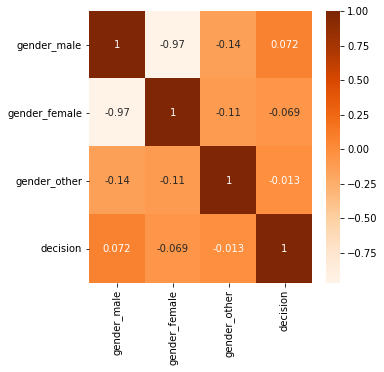

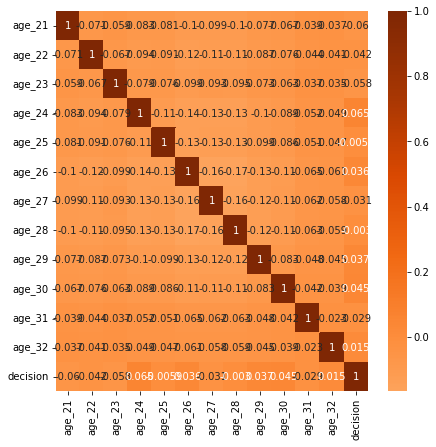

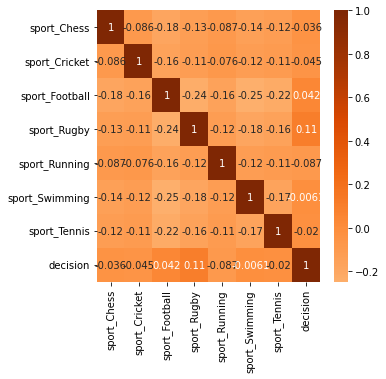

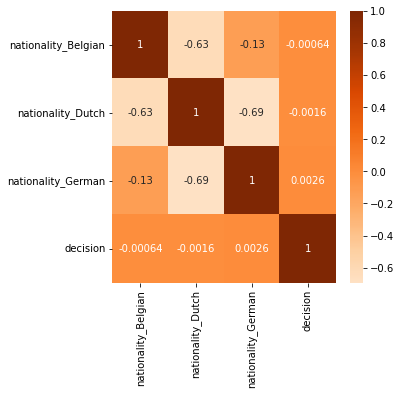

In [ ]:
matrix = dataset_gender.corr()
plt.figure(figsize=(5,5))
sns.heatmap(matrix, annot=True, cmap="Oranges", center=0)
# not so much correlation, small correlation with males but really low

matrix = dataset_age.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(matrix, annot=True, cmap="Oranges", center=0)
# not so much correlation here as well. However if we split the age group in qyarters, we can see a little trend.
# the youngest quarter has clearly a more negative correlation than the oldest quarter, but it is still very slightly. 

matrix = dataset_sports.corr()
plt.figure(figsize=(5,5))
sns.heatmap(matrix, annot=True, cmap="Oranges", center=0)
# rugby and football have some correlation. Can't really make a conclusion from there. 

matrix = dataset_nationality.corr()
plt.figure(figsize=(5,5))
sns.heatmap(matrix, annot=True, cmap="Oranges", center=0)
# here also very random. German some more correlation but very little. 


In [ ]:
# i want to make some further plots but i didn't succeed. Wanted to make some pie charts or histograms to see how many men and women were hired/ not hired
# same goes for age, sports and nationality. So if any of you could help would be great @sarthak @harsh

# Decision tree & random forest

In [ ]:
X = dataset4.drop('decision', axis = 1).values
y = dataset4['decision'].values
# Here I split the X and Y variable, where X are the features (descriptors) and Y is the decision
# Here i split the the data in a training set and a test set. I used hold-out validation as i was familiar with that before. 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, test_size=0.2, random_state=0)

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=4)
dt.fit(X_train, y_train)
# I added max_depth, as it was a very long tree first 
## i removed max_depth to increase the accuracy 
### max depth on 4 as that is the amount of descriptors

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

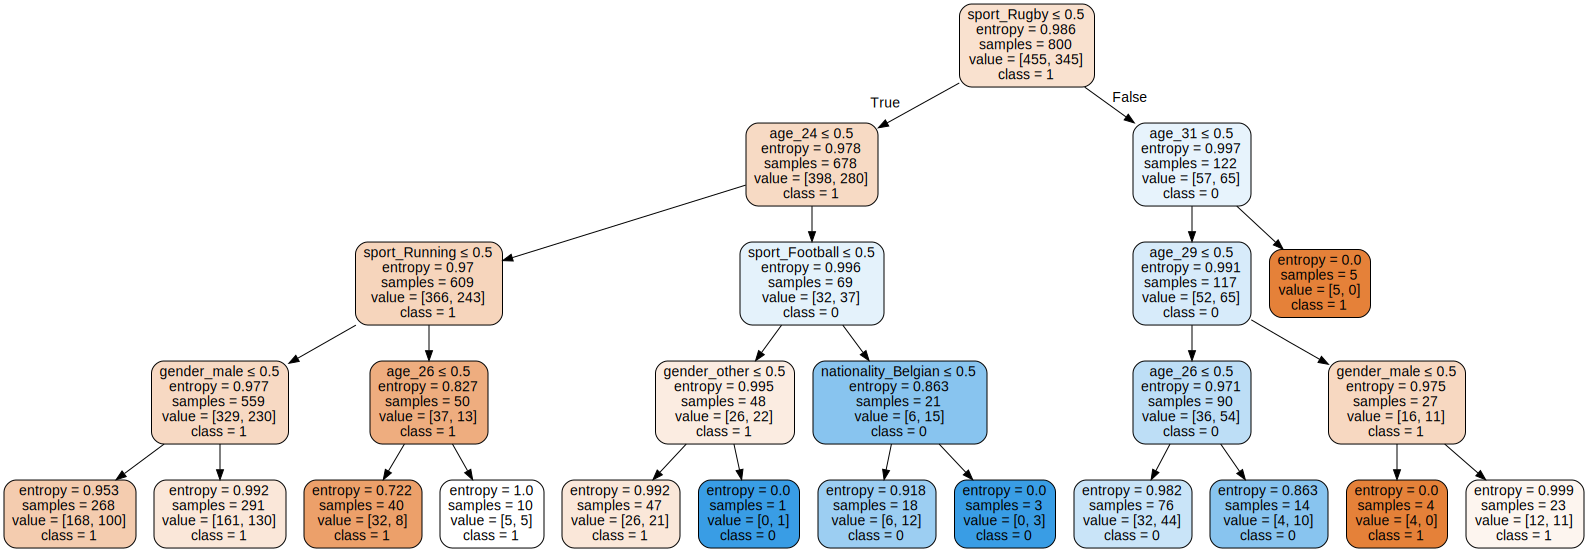

In [ ]:
# This is a visualization of the decision tree that is going to be used in the machine learning model
# I added some fill and rounded the boxes to make them more visualizing appealing
Data_Tree = tree.export_graphviz(dt, out_file=None,
            feature_names=dataset4.drop('decision', axis=1).columns,
            class_names=dataset4['decision'].unique().astype(str),
            rounded=True, filled=True,
            special_characters=True)
graph = graphviz.Source(Data_Tree)
graph

In [ ]:
# Calculating Feature importance, so we can see which descriptor has the highest influence on whether someone is hired or not 
for i, column in enumerate(dataset4.drop('decision', axis=1)):
  print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
# Male, Rugby, and 31 years old are the biggest features that influence whether someone is hired or not. Could also be seen on the correlation matrix

Importance of feature gender_female:, 0.000
Importance of feature gender_male:, 0.169
Importance of feature gender_other:, 0.034
Importance of feature age_21:, 0.000
Importance of feature age_22:, 0.000
Importance of feature age_23:, 0.000
Importance of feature age_24:, 0.102
Importance of feature age_25:, 0.000
Importance of feature age_26:, 0.094
Importance of feature age_27:, 0.000
Importance of feature age_28:, 0.000
Importance of feature age_29:, 0.067
Importance of feature age_30:, 0.000
Importance of feature age_31:, 0.170
Importance of feature age_32:, 0.000
Importance of feature sport_Chess:, 0.000
Importance of feature sport_Cricket:, 0.000
Importance of feature sport_Football:, 0.086
Importance of feature sport_Golf:, 0.000
Importance of feature sport_Rugby:, 0.130
Importance of feature sport_Running:, 0.100
Importance of feature sport_Swimming:, 0.000
Importance of feature sport_Tennis:, 0.000
Importance of feature nationality_Belgian:, 0.048
Importance of feature nationali

In [ ]:
# Now we are going to make this decision tree runmore than once by making a random forest 
rf = RandomForestClassifier (criterion='entropy', max_depth=5)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# I was trying to find a optimum for the hyperparamter 'estimators', but i don't know if it's worth the time since 
# the data is not even useful for this model. 

In [ ]:
new_data = company_A[0:200]
y_csv = new_data['decision']
id = new_data['Id']
new_data = new_data[['gender', 'age', 'sport', 'nationality', 'decision','Id']]
x_1 = pd.get_dummies(new_data, columns = ['gender', 'age', 'sport', 'nationality'])
x_1 = x_1.drop("decision",axis = 1)
x_1 = x_1.drop("Id",axis = 1)


f = open('/content/Model2.csv', 'w')
writer = csv.writer(f)
writer.writerow(id)
writer.writerow(rf.predict(x_1))
writer.writerow(y_csv)
f.close()


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# Evaluation of the Model

In [ ]:
# For evaluation the Rf model we can check the acccuracy, recall, precision, F1 score and create a confusion matrix. 
print("Accuracy on training set", rf.score(X_train, y_train))
print("Accuracy on test set", rf.score(X_test, y_test))
# Accuracy on test set higher than training

target_names = ['Not hired', 'Hired']
print(classification_report(y_test, prediction_test, target_names = target_names))
from sklearn.model_selection import cross_val_score
import numpy as np
cv_scores = cross_val_score(rf,X,y,cv = 10)*100
print(cv_scores)
print(np.mean(cv_scores))

Accuracy on training set 0.62125
Accuracy on test set 0.57
              precision    recall  f1-score   support

   Not hired       0.60      0.84      0.70       121
       Hired       0.39      0.15      0.22        79

    accuracy                           0.57       200
   macro avg       0.50      0.50      0.46       200
weighted avg       0.52      0.57      0.51       200

[56. 58. 57. 55. 55. 58. 55. 54. 59. 59.]
56.6


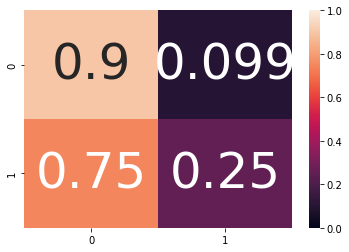

In [ ]:
 def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
  """Plots a confusion matrix."""
  if classes is not None:
    sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
  else:
      sns.heatmap(cm, vmin=0., vmax=1.,)
      plt.title(title)
      plt.ylabel('True label')
      plt.xlabel('Predicted label')

y_pred= rf.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')
# the model can predict the ones who get NOT hired (0,0) very well, but has issues in recognizing who gets hired

# divide on age intervals, gender and nationality (not relevant)



## Data splitting and preparing 

In [ ]:
# Here the data is filtered in several sets of the descriptors. Now we are going to test this and if there 
# is a higher accuracy or better F1 score, it suggests that there is a certain pattern. 
age_quarter1 = dataset4[(dataset4["age_21"] == 1) | (dataset4["age_22"] == 1) | (dataset4["age_23"] == 1)].drop(["age_24", "age_25", "age_26","age_27", "age_28", "age_29","age_30", "age_31","age_32"], axis=1)
age_quarter2 = dataset4[(dataset4["age_24"] == 1) | (dataset4["age_25"] == 1) | (dataset4["age_26"] == 1)].drop(["age_21", "age_22", "age_23","age_27", "age_28", "age_29","age_30", "age_31","age_32"], axis=1)
age_quarter3 = dataset4[(dataset4["age_27"] == 1) | (dataset4["age_28"] == 1) | (dataset4["age_29"] == 1)].drop(["age_24", "age_25", "age_26","age_21", "age_22", "age_23","age_30", "age_31","age_32"], axis=1)
age_quarter4 = dataset4[(dataset4["age_30"] == 1) | (dataset4["age_31"] == 1) | (dataset4["age_32"] == 1)].drop(["age_24", "age_25", "age_26","age_27", "age_28", "age_29","age_21", "age_22","age_23"], axis=1)
data_gen = dataset4[['gender_male', 'gender_female', 'gender_other', 'decision']]
gender_male = dataset4[dataset4["gender_male"]==1].drop(["gender_female", "gender_other"], axis=1)
gender_female = dataset4[dataset4["gender_female"]==1].drop (["gender_male", "gender_other"], axis=1)
gender_others = dataset4[dataset4["gender_other"]==1].drop(["gender_male", "gender_female"], axis=1)
data_nat = dataset4[['nationality_Belgian', 'nationality_Dutch', 'nationality_German', 'decision']]
nationality_dutch = dataset4[dataset4["nationality_Dutch"]==1].drop (["nationality_Belgian", "nationality_German"], axis=1)
nationality_belgian = dataset4[dataset4["nationality_Belgian"] == 1].drop (["nationality_Dutch", "nationality_German"], axis=1)
nationality_german = dataset4[dataset4["nationality_German"] == 1].drop (["nationality_Belgian", "nationality_Dutch"], axis=1)

In [ ]:
# defining X and y values for each seperate dataset, splitted by 
X1 = age_quarter1.drop('decision', axis = 1).values
y1 = age_quarter1['decision'].values

X2 = age_quarter2.drop('decision', axis = 1).values
y2 = age_quarter2['decision'].values

X3 = age_quarter3.drop('decision', axis = 1).values
y3 = age_quarter3['decision'].values

X4 = age_quarter4.drop('decision', axis = 1).values
y4 = age_quarter4['decision'].values

X_gen = data_gen.drop('decision', axis = 1).values
y_gen = data_gen['decision'].values

X_male = gender_male.drop('decision', axis = 1).values
y_male = gender_male['decision'].values

X_female = gender_female.drop('decision', axis = 1).values
y_female = gender_female['decision'].values

X_others = gender_others.drop('decision', axis = 1).values
y_others = gender_others['decision'].values

X_nat = data_nat.drop('decision', axis = 1).values
y_nat = data_nat['decision'].values

X_dutch = nationality_dutch.drop('decision', axis = 1).values
y_dutch = nationality_dutch['decision'].values

X_belgian = nationality_belgian.drop('decision', axis = 1).values
y_belgian = nationality_belgian['decision'].values

X_german = nationality_german.drop('decision', axis = 1).values
y_german = nationality_german['decision'].values

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size= 0.8, test_size=0.2, random_state=0)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size= 0.8, test_size=0.2, random_state=0)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, train_size= 0.8, test_size=0.2, random_state=0)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, train_size= 0.8, test_size=0.2, random_state=0)

X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(X_gen, y_gen, train_size= 0.8, test_size=0.2, random_state=0)

X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, train_size= 0.8, test_size=0.2, random_state=0)

X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, train_size= 0.8, test_size=0.2, random_state=0)

X_train_others, X_test_others, y_train_others, y_test_others = train_test_split(X_others, y_others, train_size= 0.8, test_size=0.2, random_state=0)

X_train_nat, X_test_nat, y_train_nat, y_test_nat = train_test_split(X_nat, y_nat, train_size= 0.8, test_size=0.2, random_state=0)

X_train_dutch, X_test_dutch, y_train_dutch, y_test_dutch = train_test_split(X_dutch, y_dutch, train_size= 0.8, test_size=0.2, random_state=0)

X_train_belgian, X_test_belgian, y_train_belgian, y_test_belgian = train_test_split(X_belgian, y_belgian, train_size= 0.8, test_size=0.2, random_state=0)

X_train_german, X_test_german, y_train_german, y_test_german = train_test_split(X_german, y_german, train_size= 0.8, test_size=0.2, random_state=0)

## RF age interval 1


Accuracy on testing 0.8421052631578947
              precision    recall  f1-score   support

   Not hired       0.84      1.00      0.91        32
       Hired       0.00      0.00      0.00         6

    accuracy                           0.84        38
   macro avg       0.42      0.50      0.46        38
weighted avg       0.71      0.84      0.77        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


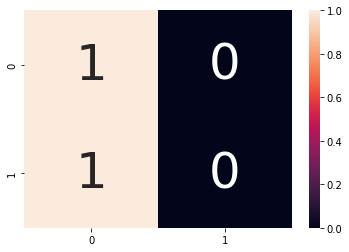

In [ ]:
rf1 = RandomForestClassifier(criterion='entropy', max_depth=4)
rf1.fit(X_train1, y_train1)
prediction_test1 = rf1.predict(X=X_test1)
print("Accuracy on testing", rf1.score(X_test1, y_test1))

print(classification_report(y_test1, prediction_test1, target_names = target_names))

cm = confusion_matrix(y_test1, prediction_test1)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

# wow pretty high

## RF age interval 2


Accuracy on testing 0.4492753623188406
              precision    recall  f1-score   support

   Not hired       0.45      0.76      0.57        33
       Hired       0.43      0.17      0.24        36

    accuracy                           0.45        69
   macro avg       0.44      0.46      0.40        69
weighted avg       0.44      0.45      0.40        69



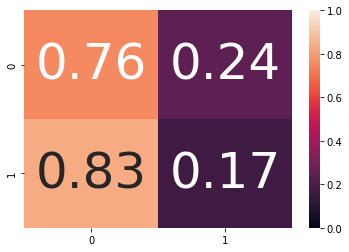

In [ ]:
rf2 = RandomForestClassifier(criterion='entropy', max_depth=4)
rf2.fit(X_train2, y_train2)
prediction_test2 = rf2.predict(X=X_test2)

print("Accuracy on testing", rf2.score(X_test2, y_test2))

print(classification_report(y_test2, prediction_test2, target_names = target_names))

cm = confusion_matrix(y_test2, prediction_test2)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

## RF age interval 3

Accuracy on testing 0.5277777777777778
              precision    recall  f1-score   support

   Not hired       0.55      0.80      0.65        40
       Hired       0.43      0.19      0.26        32

    accuracy                           0.53        72
   macro avg       0.49      0.49      0.46        72
weighted avg       0.50      0.53      0.48        72



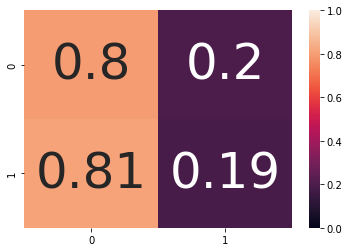

In [ ]:
rf3 = RandomForestClassifier(criterion='entropy', max_depth=4)
rf3.fit(X_train3, y_train3)
prediction_test3 = rf3.predict(X=X_test3)
print("Accuracy on testing", rf3.score(X_test3, y_test3))
print(classification_report(y_test3, prediction_test3, target_names = target_names))

cm = confusion_matrix(y_test3, prediction_test3)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

## RF age interval 4

Accuracy on testing 0.4782608695652174
              precision    recall  f1-score   support

   Not hired       0.50      0.58      0.54        12
       Hired       0.44      0.36      0.40        11

    accuracy                           0.48        23
   macro avg       0.47      0.47      0.47        23
weighted avg       0.47      0.48      0.47        23



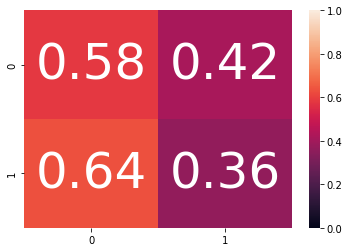

In [ ]:
rf4 = RandomForestClassifier(criterion='entropy', max_depth=4)
rf4.fit(X_train4, y_train4)
prediction_test4 = rf4.predict(X=X_test4)
print("Accuracy on testing", rf4.score(X_test4, y_test4))
print(classification_report(y_test4, prediction_test4, target_names = target_names))

cm = confusion_matrix(y_test4, prediction_test4)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

## gender male

accuracy on testing 0.48623853211009177
              precision    recall  f1-score   support

   Not hired       0.49      0.87      0.63        54
       Hired       0.46      0.11      0.18        55

    accuracy                           0.49       109
   macro avg       0.48      0.49      0.40       109
weighted avg       0.48      0.49      0.40       109



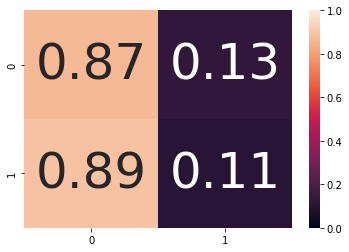

In [ ]:
rf_male = RandomForestClassifier(criterion='entropy', max_depth=4)
rf_male.fit(X_train_male, y_train_male)
prediction_test_male = rf_male.predict(X=X_test_male)
print("accuracy on testing", rf_male.score(X_test_male, y_test_male))
print(classification_report(y_test_male, prediction_test_male, target_names = target_names))

cm = confusion_matrix(y_test_male, prediction_test_male)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

## gender female

accuracy on testing 0.6067415730337079
              precision    recall  f1-score   support

   Not hired       0.60      0.98      0.75        53
       Hired       0.67      0.06      0.10        36

    accuracy                           0.61        89
   macro avg       0.64      0.52      0.43        89
weighted avg       0.63      0.61      0.49        89



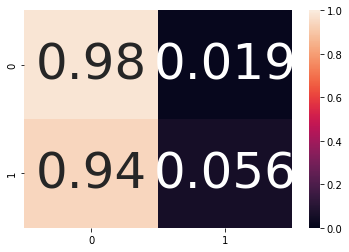

In [ ]:
rf_female = RandomForestClassifier(criterion='entropy', max_depth=4)
rf_female.fit(X_train_female, y_train_female)
prediction_test_female = rf_female.predict(X=X_test_female)
print("accuracy on testing", rf_female.score(X_test_female, y_test_female))
print(classification_report(y_test_female, prediction_test_female, target_names = target_names))

cm = confusion_matrix(y_test_female, prediction_test_female)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

## gender others

accuracy on testing 0.25
              precision    recall  f1-score   support

   Not hired       0.25      1.00      0.40         1
       Hired       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


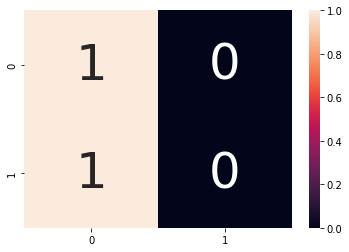

In [ ]:
rf_others = RandomForestClassifier(criterion='entropy', max_depth=4)
rf_others.fit(X_train_others, y_train_others)
prediction_test_others = rf_others.predict(X=X_test_others)
print("accuracy on testing", rf_others.score(X_test_others, y_test_others))
print(classification_report(y_test_others, prediction_test_others, target_names = target_names))

cm = confusion_matrix(y_test_others, prediction_test_others)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

## Nationality Dutch

accuracy on testing 0.6129032258064516
              precision    recall  f1-score   support

   Not hired       0.63      0.87      0.73        93
       Hired       0.54      0.23      0.32        62

    accuracy                           0.61       155
   macro avg       0.58      0.55      0.52       155
weighted avg       0.59      0.61      0.57       155



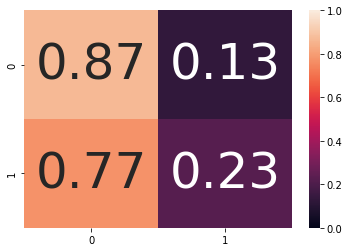

In [ ]:
rf_dutch = RandomForestClassifier(criterion='entropy', max_depth=4)
rf_dutch.fit(X_train_dutch, y_train_dutch)
prediction_test_dutch = rf_dutch.predict(X=X_test_dutch)
print("accuracy on testing", rf_dutch.score(X_test_dutch, y_test_dutch))
print(classification_report(y_test_dutch, prediction_test_dutch, target_names = target_names))

cm = confusion_matrix(y_test_dutch, prediction_test_dutch)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

## Nationality Belgian

accuracy on testing 0.42857142857142855
              precision    recall  f1-score   support

   Not hired       0.56      0.64      0.60        14
       Hired       0.00      0.00      0.00         7

    accuracy                           0.43        21
   macro avg       0.28      0.32      0.30        21
weighted avg       0.38      0.43      0.40        21



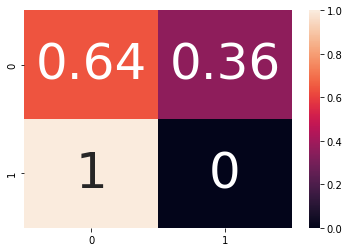

In [ ]:
rf_belgian = RandomForestClassifier(criterion='entropy', max_depth=4)
rf_belgian.fit(X_train_belgian, y_train_belgian)
prediction_test_belgian = rf_belgian.predict(X=X_test_belgian)
print("accuracy on testing", rf_belgian.score(X_test_belgian, y_test_belgian))
print(classification_report(y_test_belgian, prediction_test_belgian, target_names = target_names))


cm = confusion_matrix(y_test_belgian, prediction_test_belgian)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

## Nationality German

accuracy on testing 0.32
              precision    recall  f1-score   support

   Not hired       0.41      0.50      0.45        14
       Hired       0.12      0.09      0.11        11

    accuracy                           0.32        25
   macro avg       0.27      0.30      0.28        25
weighted avg       0.29      0.32      0.30        25



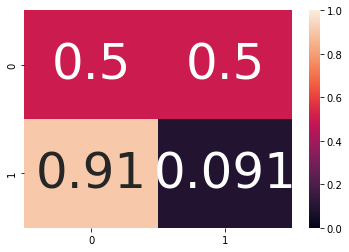

In [ ]:
rf_german = RandomForestClassifier(criterion='entropy', max_depth=4)
rf_german.fit(X_train_german, y_train_german)
prediction_test_german = rf_german.predict(X=X_test_german)
print("accuracy on testing", rf_german.score(X_test_german, y_test_german))
print(classification_report(y_test_german, prediction_test_german, target_names = target_names))

cm = confusion_matrix(y_test_german, prediction_test_german)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

## ONLY GENDERS in dataset

accuracy on testing 0.605
              precision    recall  f1-score   support

   Not hired       0.60      1.00      0.75       121
       Hired       0.00      0.00      0.00        79

    accuracy                           0.60       200
   macro avg       0.30      0.50      0.38       200
weighted avg       0.37      0.60      0.46       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


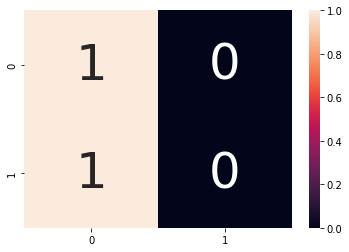

In [ ]:
rf_gen = RandomForestClassifier(criterion='entropy', max_depth=4)
rf_gen.fit(X_train_gen, y_train_gen)
prediction_test_gen = rf_gen.predict(X=X_test_gen)
print("accuracy on testing", rf_gen.score(X_test_gen, y_test_gen))
print(classification_report(y_test_gen, prediction_test_gen, target_names = target_names))

cm = confusion_matrix(y_test_gen, prediction_test_gen)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

## ONLY NATIONALITIES in dataset

accuracy on testing 0.605
              precision    recall  f1-score   support

   Not hired       0.60      1.00      0.75       121
       Hired       0.00      0.00      0.00        79

    accuracy                           0.60       200
   macro avg       0.30      0.50      0.38       200
weighted avg       0.37      0.60      0.46       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


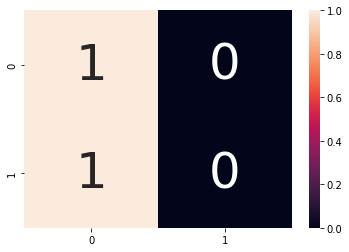

In [ ]:
rf_nat = RandomForestClassifier(criterion='entropy', max_depth=4)
rf_nat.fit(X_train_nat, y_train_nat)
prediction_test_nat = rf_nat.predict(X=X_test_nat)
print("accuracy on testing", rf_nat.score(X_test_nat, y_test_nat))
print(classification_report(y_test_nat, prediction_test_nat, target_names = target_names))

cm = confusion_matrix(y_test_nat, prediction_test_nat)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)